<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/Agglomerative_CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
creditdf=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Creditcard_Dataset.csv')

In [ ]:
creditdf.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [ ]:
creditdf['CREDIT_LIMIT'].fillna(value=creditdf['CREDIT_LIMIT'].mean(),inplace=True)

In [ ]:
creditdf.dropna(inplace=True)

In [ ]:
creditdf=creditdf.drop(columns=['CUST_ID'])

In [ ]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()
creditdf_scaled=norm.fit_transform(creditdf)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7,random_state=0)
pca.fit(creditdf_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

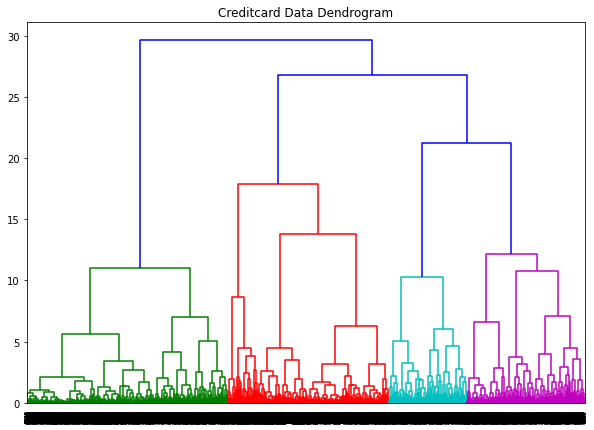

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Creditcard Data Dendrogram")
dend1=shc.dendrogram(shc.linkage(creditdf_scaled,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,linkage='ward')
cluster.fit(creditdf_scaled)
labels=cluster.labels_

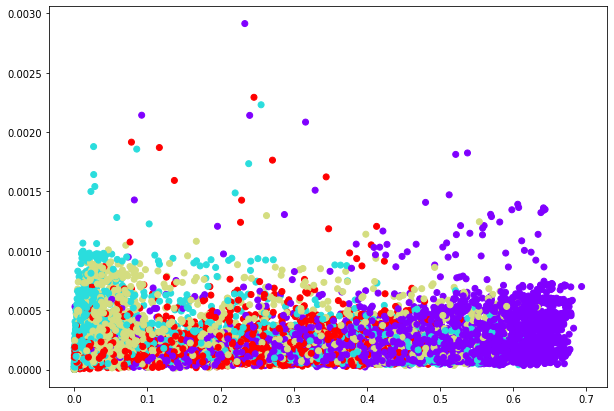

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(creditdf_scaled[:,0], creditdf_scaled[:,1], c=cluster.fit_predict(creditdf_scaled), cmap='rainbow')

In [ ]:
from sklearn.metrics import silhouette_score
silhoutte_scr=silhouette_score(creditdf_scaled,cluster.labels_)
print("For n_clusters =", 4,
      "Average Silhoutte Score =", silhoutte_scr)

For n_clusters = 4 Average Silhoutte Score = 0.28201452938377347
